<a href="https://colab.research.google.com/github/MoseAIML/Moses-/blob/main/Hyperparameter_Tuning_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='#2F4F4F'>1. Defining the Question</font>

### a) Specifying the Data Analysis Question

As a Data Scientist working for Airbnb, you have been tasked to create a model that
predicts Airbnb rental prices for the city of Amsterdam. Popularity for Airbnbs in
Amsterdam has grown over the past years and you are required to build a solution the
would make optimal predictions.

### b) Defining the Metric for Success

The metrics we will use to evaluate our model are RMSE and R2 scores.

### c) Understanding the Context 

Airbnb is an American vacation rental online marketplace company based in San
Francisco, California, United States. Airbnb offers arrangement for lodging, primarily
homestays, or tourism experiences. The company does not own any of the real estate
listings, nor does it host events; it acts as a broker, receiving commissions from each
booking.

### d) Recording the Experimental Design

* Defining the Research Question
* Data Importation
* Data Exploration
* Data Cleaning
* Data Analysis (Univariate and Bivariate)
* Data Preparation
* Data Modeling
* Model Evaluation
* Challenging your Solution
* Recommendations / Conclusion 

### e) Data Relevance

The data provided was relevant to answering the research question.

# <font color='#2F4F4F'>2. Data Cleaning & Preparation</font>

In [1]:
# loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max.columns', None)
pd.set_option('display.max_colwidth', None)
%matplotlib inline

In [3]:
# loading and previewing dataset
df = pd.read_csv('listing_summary.csv')
df.sample(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
14727,29677216,Cannabis & Cat Lovers: Amsterdam's 1st Airbnbud,29514830,Amandine,NaN,Oud-Oost,52.36318,4.92463,Private room,85,1,80,2020-03-13,4.63,1,78
5739,12032558,Luxe&Cosy in the Heart of Amsterdam,5696237,Pookie,NaN,Centrum-West,52.37105,4.89354,Entire home/apt,300,3,32,2020-02-27,0.66,1,119
16100,34069242,Amazingly located luxurious apartment in Amsterdam,2395124,Emma,NaN,Centrum-West,52.37720,4.89327,Entire home/apt,199,2,9,2019-06-21,0.81,2,0


In [5]:
# loading glossary
glossary = pd.read_csv('/content/Glossary - Sheet1 (1) (1).csv', header = None)
glossary

,0
0,room_id: A unique number identifying an Airbnb listing.
1,host_id: A unique number identifying an Airbnb host.
2,neighborhood: A subregion of the city or search area for which the survey is carried out. For some cities there is no neighbourhood information.
3,"room_type: One of “Entire home/apt”, “Private room”, or “Shared room”."
4,host_response_rate: The rate at which the particular host responds to the customers.
5,"price: The price (in $US) for a night stay. In early surveys, there may be some values that were recorded by month."
6,accomodates: The number of guests a listing can accommodate.
7,bathrooms: The number of bathrooms a listing offers.
8,bedrooms: The number of bedrooms a listing offers.
9,beds: The number of beds a listing offers.


In [6]:
# dropping the 'name' variable
df.drop(columns = ['name'], inplace = True)

In [7]:
# checking dataset shape
df.shape

(19362, 15)

In [8]:
# checking data types
df.dtypes

id                                  int64
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [9]:
# dropping duplicates, if any
df.drop_duplicates(inplace = True)
df.shape

(19362, 15)

In [10]:
# checking for missing data
df.isna().sum()

id                                    0
host_id                               0
host_name                             4
neighbourhood_group               19362
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                        2284
reviews_per_month                  2284
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [11]:
# dropping the 'neighbourhood_group' variable, and the records with missing values for 'last_review'
# and 'reviews_per_month'
df.drop(columns = ['neighbourhood_group'], inplace = True)
df.dropna(inplace = True)

# confirming we have no null values
df.isnull().sum()

id                                0
host_id                           0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [12]:
df.shape

(17075, 14)

In [13]:
# get the unique value of each variable to ensure there are no anomalies
cols = df.columns.to_list()

for col in cols:
    print("Variable:", col)
    print("Number of unique variables:", df[col].nunique())
    print(df[col].unique())
    print()

Variable: id
Number of unique variables: 17075
[    2818    20168    25428 ... 42947577 43031829 43076538]

Variable: host_id
Number of unique variables: 15182
[     3159     59484     56142 ... 341432744 148433830 342882021]

Variable: host_name
Number of unique variables: 5382
['Daniel' 'Alexander' 'Joan' ... 'The Niu Fender' 'Marcela' 'Addie']

Variable: neighbourhood
Number of unique variables: 22
['Oostelijk Havengebied - Indische Buurt' 'Centrum-Oost' 'Centrum-West'
 'Zuid' 'De Pijp - Rivierenbuurt' 'De Baarsjes - Oud-West' 'Bos en Lommer'
 'Westerpark' 'Oud-Oost' 'Noord-West' 'Slotervaart' 'Oud-Noord'
 'Geuzenveld - Slotermeer' 'Watergraafsmeer' 'IJburg - Zeeburgereiland'
 'Noord-Oost' 'Gaasperdam - Driemond' 'Buitenveldert - Zuidas'
 'Bijlmer-Oost' 'De Aker - Nieuw Sloten' 'Osdorp' 'Bijlmer-Centrum']

Variable: latitude
Number of unique variables: 5720
[52.36575 52.36509 52.37297 ... 52.40828 52.40598 52.38885]

Variable: longitude
Number of unique variables: 9193
[4.94142 4.89

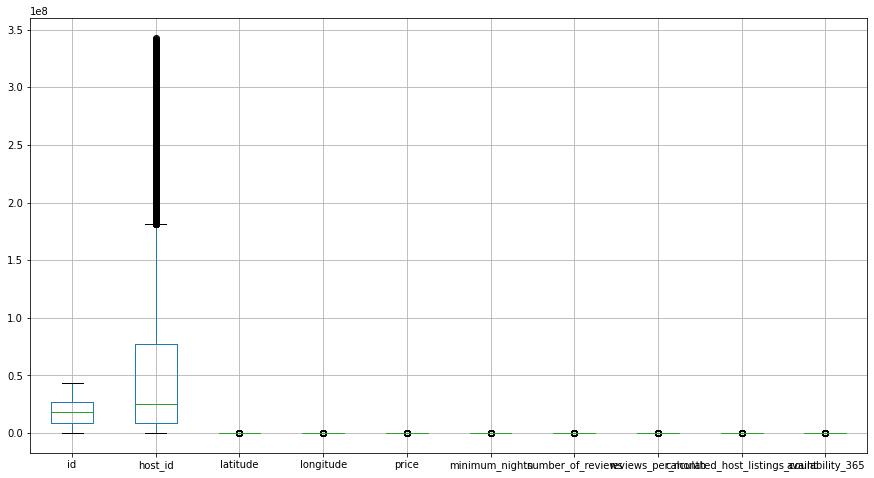

In [14]:
# visualizing the distribution of outliers
plt.figure(figsize = (15, 8))
df.boxplot()
plt.show()

In [15]:
# getting the records with outliers
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3 - q1

outliers_df = df[((df < (q1 - 1.5 * iqr)) | (df > (q3 + 1.5 * iqr))).any(axis = 1)]
print(outliers_df.shape)
outliers_df.sample(3)

(8544, 14)


<ipython-input-15-945038013b0f>:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers_df = df[((df < (q1 - 1.5 * iqr)) | (df > (q3 + 1.5 * iqr))).any(axis = 1)]


,id,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
11722,21943080,151062320,Jasper & Leslie,De Baarsjes - Oud-West,52.36584,4.87644,Entire home/apt,145,2,196,2020-03-16,6.78,2,166
2324,4696241,24279237,Sandra,De Pijp - Rivierenbuurt,52.35141,4.90938,Entire home/apt,198,1,135,2020-03-11,2.07,4,44
9964,19177220,44853166,Demir,De Baarsjes - Oud-West,52.36346,4.87741,Entire home/apt,360,1,14,2018-01-02,0.44,1,0


In [16]:
# calculating percentage of outliers
round((outliers_df.shape[0] / df.shape[0]) * 100, 2)

50.04

It would be tricky to drop the records with outliers since that will reduce our dataset by half so we will leave them there. However, we will drop the host_id variable later on, right before modeling.

# <font color='#2F4F4F'>3. Data Analysis</font>

## 3.1 Univariate Analysis 

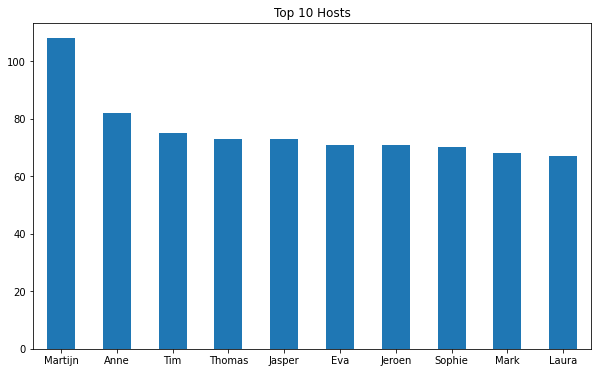

In [17]:
# getting the top 10 most common hosts
plt.figure(figsize = (10, 6))
df.host_name.value_counts()[:10].plot(kind = 'bar', rot = 0)
plt.title("Top 10 Hosts")
plt.show()

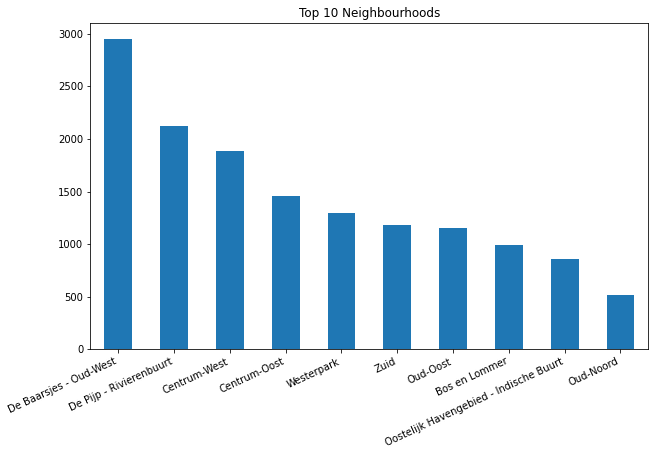

In [18]:
# getting the top 10 most common neighbourhoods
plt.figure(figsize = (10, 6))
df.neighbourhood.value_counts()[:10].plot(kind = 'bar', rot = 25)
plt.xticks(ha = "right")
plt.title("Top 10 Neighbourhoods")
plt.show()

In [19]:
df.room_type.value_counts()

Entire home/apt    13308
Private room        3497
Hotel room           232
Shared room           38
Name: room_type, dtype: int64

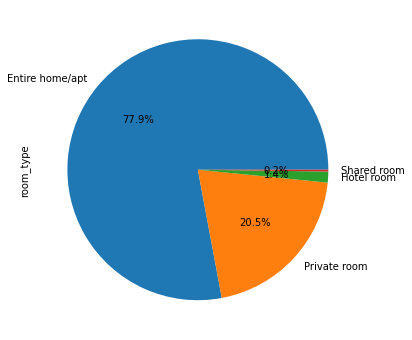

In [20]:
# getting the most common room types
plt.figure(figsize = (6, 6))
labels = ['Entire home/apt', 'Private room', 'Hotel room', 'Shared room']
df.room_type.value_counts().plot(kind = 'pie', autopct = '%0.1f%%', labels = labels)
plt.show()

<ipython-input-21-012431602acd>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


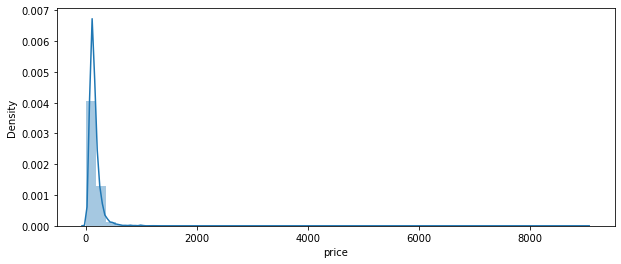

In [21]:
# distribution of price
plt.figure(figsize = (10,4))
sns.distplot(df['price'])
plt.show()

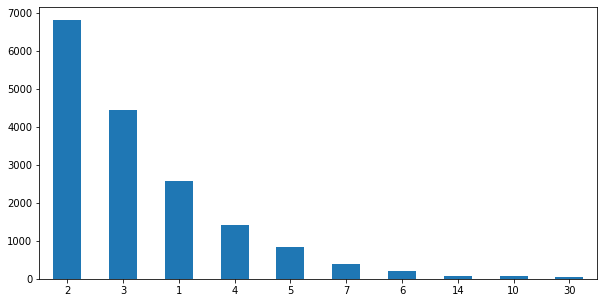

In [22]:
# getting the top 10 most common minimum number of nights to spend
plt.figure(figsize = (10, 5))
df.minimum_nights.value_counts()[:10].plot(kind = 'bar', rot = 0)
plt.show()

## 3.2 Bivariate Analysis

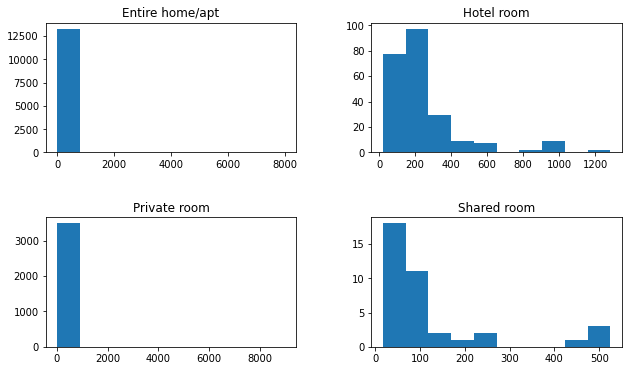

In [23]:
# price by room type
df.hist('price', by = 'room_type', rot = 0, figsize = (10, 6))
plt.show()

In [24]:
# average price by neighbourhood
df.groupby('neighbourhood')['price'].mean().sort_values(ascending = False)

neighbourhood
Centrum-West                              203.653397
Centrum-Oost                              190.534247
Zuid                                      178.813243
Oud-Noord                                 168.763566
De Pijp - Rivierenbuurt                   166.601787
IJburg - Zeeburgereiland                  157.723077
Westerpark                                151.241140
De Baarsjes - Oud-West                    149.376228
Oud-Oost                                  144.606957
Watergraafsmeer                           141.199125
Buitenveldert - Zuidas                    137.690355
Oostelijk Havengebied - Indische Buurt    135.101163
Noord-Oost                                130.495833
Noord-West                                126.318885
Bos en Lommer                             122.525304
De Aker - Nieuw Sloten                    121.268908
Slotervaart                               119.791549
Geuzenveld - Slotermeer                   113.937143
Osdorp                          

In [25]:
# average price by neighbourhood
df.groupby('minimum_nights')['price'].mean().sort_values(ascending = False)

minimum_nights
365     3000.000000
99       999.000000
200      999.000000
52       429.000000
30       331.551020
222      300.000000
27       275.000000
48       250.000000
31       243.750000
150      203.000000
21       201.761905
15       197.888889
1000     185.000000
240      180.000000
28       175.900000
7        174.760526
300      170.500000
180      169.250000
3        166.936544
14       163.476923
38       159.000000
4        158.828311
45       157.500000
5        155.676190
1        154.149670
60       152.071429
2        151.557365
24       150.000000
22       150.000000
6        146.276923
59       146.250000
40       139.000000
9        136.250000
41       131.000000
20       130.185185
1001     130.000000
16       129.666667
100      127.000000
90       126.250000
10       125.709677
18       125.000000
8        120.730769
29       120.000000
999      120.000000
25       118.555556
12       118.083333
500      110.000000
50       110.000000
17       109.500000
95   

## 3.3 Feature Engineering

In [26]:
# getting the average price per room type
average_price_per_room = df.groupby('room_type')['price'].mean().sort_values(ascending = False)

# adding to our dataset
df['average price per room'] = df['room_type'].map(average_price_per_room)

# previewing our modified dataset
df.head(3)

,id,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,average price per room
0,2818,3159,Daniel,Oostelijk Havengebied - Indische Buurt,52.36575,4.94142,Private room,59,3,278,2020-02-14,2.06,1,169,109.421504
1,20168,59484,Alexander,Centrum-Oost,52.36509,4.89354,Private room,100,1,340,2020-04-09,2.76,2,106,109.421504
2,25428,56142,Joan,Centrum-West,52.37297,4.88339,Entire home/apt,125,14,5,2020-02-09,0.18,1,132,169.179967


In [27]:
# getting the average price per neighbourhood
average_price_per_neighbourhood = df.groupby('neighbourhood')['price'].mean().sort_values(ascending = False)

# adding to our dataset
df['average price per neighbourhood'] = df['neighbourhood'].map(average_price_per_neighbourhood)

# previewing our modified dataset
df.head(3)

,id,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,average price per room,average price per neighbourhood
0,2818,3159,Daniel,Oostelijk Havengebied - Indische Buurt,52.36575,4.94142,Private room,59,3,278,2020-02-14,2.06,1,169,109.421504,135.101163
1,20168,59484,Alexander,Centrum-Oost,52.36509,4.89354,Private room,100,1,340,2020-04-09,2.76,2,106,109.421504,190.534247
2,25428,56142,Joan,Centrum-West,52.37297,4.88339,Entire home/apt,125,14,5,2020-02-09,0.18,1,132,169.179967,203.653397


In [28]:
# encoding 'room_type'
df = pd.get_dummies(df, columns=['room_type']).head(3)

In [29]:
# dropping unneeded columns in preparation for modeling
df.drop(columns = ['id','host_id','host_name','neighbourhood','last_review'], inplace = True)
df

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,average price per room,average price per neighbourhood,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,52.36575,4.94142,59,3,278,2.06,1,169,109.421504,135.101163,0,0,1,0
1,52.36509,4.89354,100,1,340,2.76,2,106,109.421504,190.534247,0,0,1,0
2,52.37297,4.88339,125,14,5,0.18,1,132,169.179967,203.653397,1,0,0,0


# <font color='#2F4F4F'>4. Data Modeling</font>

In [30]:
# split into features (X) and label (Y)
X = df.iloc[:, [0,1,3,4,5,6,7,8,9,10,11,12,13]] 
y = df.iloc[:, 2]

In [31]:
# split into 70-30 train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [32]:
# scaling our features
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler() 
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

For purposes of simplicity, we will work with the following regressors:
* Decision Tree Regressor
* Random Forest Regressor

## 4.1 Normal Modeling

In [33]:
# loading our regressors
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestRegressor

# instantiating our regressors
decision_classifier = DecisionTreeClassifier(random_state=42)
regr = RandomForestRegressor(max_depth=2, random_state=0)

# fitting to our training data
decision_classifier.fit(X_train, y_train)
regr.fit(X_train, y_train)

# making predictions
decision_y_prediction = decision_classifier.predict(X_test)
regr_y_prediction = regr.predict(X_test)

# evaluating the RMSE and R2 scores
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, decision_y_prediction)
mse = mean_squared_error(y_test, regr_y_prediction)
R2_score = decision_classifier.score(X_train, y_train)
R2_score = regr.score(X_train, y_train)
print('DecisionTreeClassifier')
print('MSE =', mse)
print('RMSE =', mse ** 0.5)
print('R2 Score =', R2_score)
print('RandomForestRegressor')
print('MSE =', mse)
print('RMSE =', mse ** 0.5)
print('R2 Score =', R2_score)

DecisionTreeClassifier
MSE = 2525.0625
RMSE = 50.25
R2 Score = 0.7232000000000001
RandomForestRegressor
MSE = 2525.0625
RMSE = 50.25
R2 Score = 0.7232000000000001


In [34]:
# 10% of target variable's mean
y.mean() * 10/100

9.466666666666667

Record your observations.

## 4.2 Modeling with Grid Search

In [ ]:
# setting our grid parameters
YOUR CODE HERE

# setting up the Grid Search with our regressors with cv = 5 and n_jobs = -1
YOUR CODE HERE

# fitting to training data
YOUR CODE HERE

# getting the best parameters
YOUR CODE HERE

In [ ]:
# implementing this recommendation

# instantiating our regressors with the recommended parameters
YOUR CODE HERE

# fitting to our training data
YOUR CODE HERE

# making predictions
YOUR CODE HERE

# evaluating the RMSE and R2 scores
YOUR CODE HERE

## 4.3 Modeling with Random Search

In [ ]:
# setting up our parameters and the respective distributions to sample from
YOUR CODE HERE

# setting up Randomized Search for each regressor with cv = 5
YOUR CODE HERE

# fitting to training data
YOUR CODE HERE

# getting the best parameters
YOUR CODE HERE

In [ ]:
# implementing this recommendation

# instantiating our regressors using the recommended parameters
YOUR CODE HERE

# fitting to our training data
YOUR CODE HERE

# making predictions
YOUR CODE HERE

# evaluating the RMSE and R2 scores
YOUR CODE HERE

## 4.4 Modeling with Bayesian Optimization

In [ ]:
# importing the hyperopt library and cross_val_score
YOUR CODE HERE

# setting up a space dictionary
YOUR CODE HERE

# setting up our objective functions
YOUR CODE HERE

# running our optimizers and setting max_evals to 100
YOUR CODE HERE

#printing our outcomes
YOUR CODE HERE

In [ ]:
# instantiating our regressors using the recommended parameters
YOUR CODE HERE

# fitting to our training data
YOUR CODE HERE

# making predictions
YOUR CODE HERE

# evaluating the RMSE and R2 scores
YOUR CODE HERE

# <font color='#2F4F4F'>5. Summary of Findings</font>

Summarize your findings.

# <font color='#2F4F4F'>6. Recommendations</font>

Provide your recommendations.

# <font color='#2F4F4F'>7. Challenging your Solution</font>

### a) Did we have the right question?


### b) Did we have the right data?


### c) What can be done to improve the solution?
